##INTRODUCTION

In this notebook, Causal RL is analysed using all datasets (both synthetic csuite ones and the real sachs one). Hartemink discretization is also applied to all datasets and experiment w/ and w/out discreatization. Moreover, performance comparision is made to see the effect of hyperparameter tuning for the RL model.

## Causal RL

**Paper:** [CAUSAL DISCOVERY WITH REINFORCEMENT
LEARNING
](https://arxiv.org/pdf/1906.04477)

**Reference:** [gcastle](https://github.com/huawei-noah/trustworthyAI/tree/master/gcastle)

Causal discovery with RL is proposed to search for the DAG with the optimal score. The reward is designed to incorporate a predefined score function and two penalty terms to enforce acyclicity. The actor-critic algorithm is used as the RL algorithm, where the actor is constructed based on recently developed encoder-decoder models. The model uses policy gradient and stochastic optimization methods to train the weights of the NNs, and our output is the graph that achieves the best reward, among all graphs generated in the training process.

The encoder-decoder model takes observable data as input and generates graph adjacency matrices that are used to compute rewards. In contrast with typical RL applications where the goal is to learn a policy, RL is used as a search strategy and our final output would be the graph, among all graphs generated during training, that achieves the best reward.

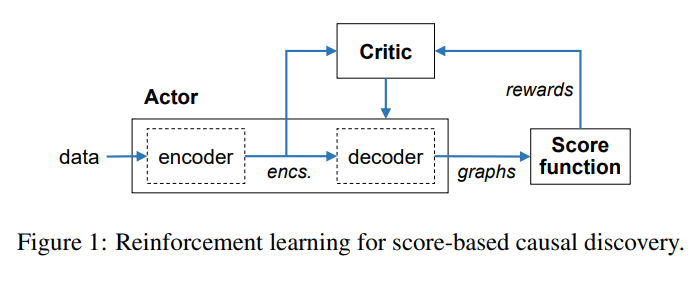

**Encoder:**
We use the attention based encoder in the Transformer structure proposed by Vaswani et al. (2017). Denote the outputs of the encoder by enc_i
, i = 1, 2, . . . , d, with dimension d_e.

**Decoder:**
Our decoder generates the graph adjacency matrix in an element-wise manner, by building relationships between two encoder outputs enc_i and enc_j .
We consider the single layer decoder

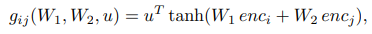

where W1, W2, u are trainable parameters and dh is the hidden dimension
associated with the decoder.

In [2]:
import torch
import pandas as pd
import numpy as np
from data.csuite.csuite_datasets import *
from data.sachs.sachs_datasets import unaltered_dataset
from models.causal_rl import causal_rl, tuning_rl
from models.pc import hartemink_discreatization
from sklearn.model_selection import ParameterGrid
from collections import Counter
import sklearn.feature_selection
import matplotlib.pyplot as plt

In [16]:
datasets = [lingauss, linexp, nonlingauss, nonlin_simpson, symprod_simpson, large_backdoor, weak_arrows]
metrics_rl_not_tuned = []
metrics_rl_not_tuned_hartemink = []
metrics_rl_tuned_csuite  = []
metrics_rl_tuned_csuite_hartemink  = []

~~~~~ WITHOUT DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:12<00:00,  8.20it/s]


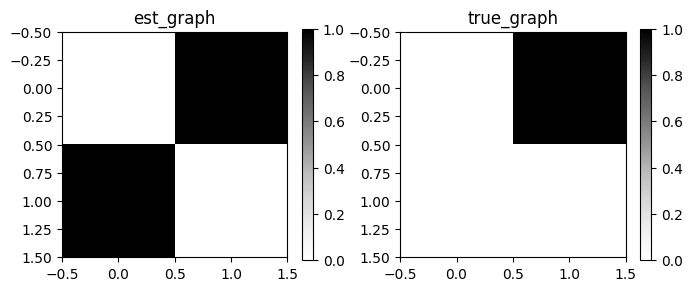

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 1, 'precision': 0.5, 'recall': 1.0, 'F1': 0.6667, 'gscore': 0.0}
lingauss :  {'adjacency_f1': 1.0, 'orientation_f1': 0.0}



~~~~~ WITH DISCRETIZATION ~~~~~
Working on the 60th level of discretization.
Working on the 50th level of discretization.
Working on the 40th level of discretization.
Working on the 30th level of discretization.
Working on the 20th level of discretization.
Working on the 10th level of discretization.


100%|██████████| 100/100 [00:09<00:00, 11.04it/s]


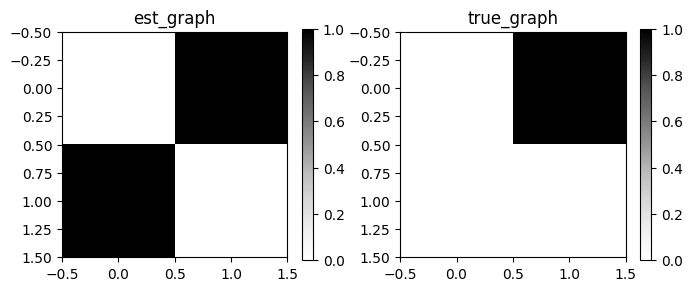

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 1, 'precision': 0.5, 'recall': 1.0, 'F1': 0.6667, 'gscore': 0.0}
lingauss :  {'adjacency_f1': 1.0, 'orientation_f1': 0.0}


In [10]:
# ~~~~~~~~ LINGAUSS ~~~~~~~~
csuite_dataset = lingauss

# Without discretization
print("~~~~~ WITHOUT DISCRETIZATION ~~~~~")
df_lingauss, gt_graph_lingauss = csuite_dataset(2000, True, True)
metrics_rl_not_tuned.append(causal_rl(df_lingauss, gt_graph_lingauss, 'lingauss', {'nb_epoch': 100}))

# With discretization
print("\n\n\n~~~~~ WITH DISCRETIZATION ~~~~~")
df_lingauss_hart = hartemink_discretization(df_lingauss)
metrics_rl_not_tuned_hartemink .append(causal_rl(df_lingauss_hart, gt_graph_lingauss, 'lingauss', {'nb_epoch': 100}))

~~~~~ WITHOUT DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:08<00:00, 11.50it/s]


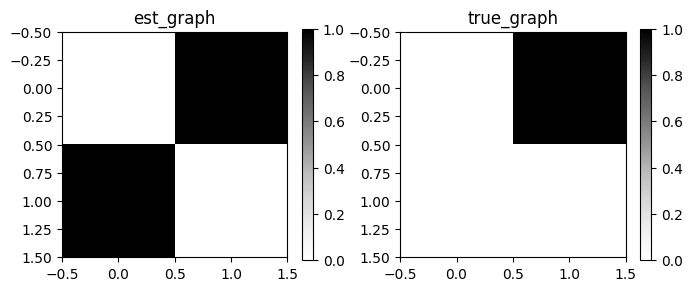

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 1, 'precision': 0.5, 'recall': 1.0, 'F1': 0.6667, 'gscore': 0.0}
linexp :  {'adjacency_f1': 1.0, 'orientation_f1': 0.0}



~~~~~ WITH DISCRETIZATION ~~~~~
Working on the 60th level of discretization.
Working on the 50th level of discretization.
Working on the 40th level of discretization.
Working on the 30th level of discretization.
Working on the 20th level of discretization.
Working on the 10th level of discretization.


100%|██████████| 100/100 [00:14<00:00,  6.77it/s]


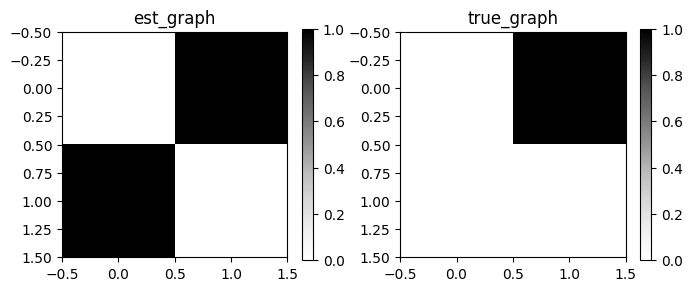

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 1, 'precision': 0.5, 'recall': 1.0, 'F1': 0.6667, 'gscore': 0.0}
linexp :  {'adjacency_f1': 1.0, 'orientation_f1': 0.0}


In [11]:
# ~~~~~~~~ LINEXP ~~~~~~~~
csuite_dataset = linexp

# Without discretization
print("~~~~~ WITHOUT DISCRETIZATION ~~~~~")
df_linexp, gt_graph_linexp = csuite_dataset(2000, True, True)
metrics_rl_not_tuned.append(causal_rl(df_linexp, gt_graph_linexp, 'linexp', {'nb_epoch': 100}))

# With discretization
print("\n\n\n~~~~~ WITH DISCRETIZATION ~~~~~")
df_linexp_hart = hartemink_discretization(df_linexp)
metrics_rl_not_tuned_hartemink .append(causal_rl(df_linexp_hart, gt_graph_linexp, 'linexp', {'nb_epoch': 100}))

~~~~~ WITHOUT DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:10<00:00,  9.91it/s]


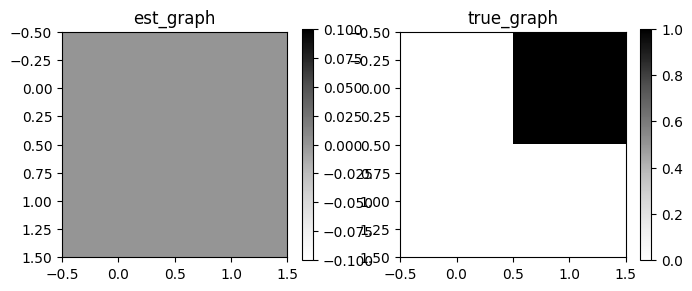

/usr/local/lib/python3.10/dist-packages/castle/metrics/evaluation.py:224: RuntimeWarning: invalid value encountered in divide
  precision = TP/TP_FP


{'fdr': 0.0, 'tpr': 0.0, 'fpr': 0.0, 'shd': 1, 'nnz': 0, 'precision': nan, 'recall': 0.0, 'F1': nan, 'gscore': 0.0}
nonlingauss :  {'adjacency_f1': 0.0, 'orientation_f1': 0.0}



~~~~~ WITH DISCRETIZATION ~~~~~
Working on the 60th level of discretization.
Working on the 50th level of discretization.
Working on the 40th level of discretization.
Working on the 30th level of discretization.
Working on the 20th level of discretization.
Working on the 10th level of discretization.


100%|██████████| 100/100 [00:08<00:00, 11.49it/s]


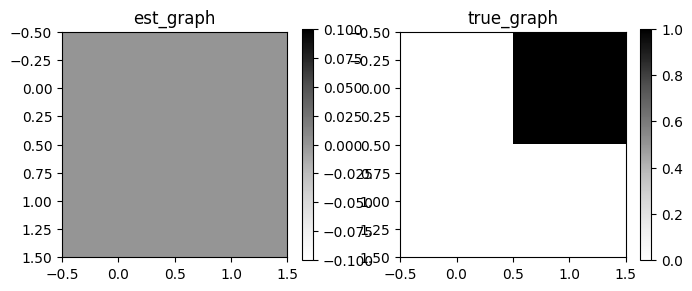

{'fdr': 0.0, 'tpr': 0.0, 'fpr': 0.0, 'shd': 1, 'nnz': 0, 'precision': nan, 'recall': 0.0, 'F1': nan, 'gscore': 0.0}
nonlingauss :  {'adjacency_f1': 0.0, 'orientation_f1': 0.0}


/usr/local/lib/python3.10/dist-packages/castle/metrics/evaluation.py:224: RuntimeWarning: invalid value encountered in divide
  precision = TP/TP_FP


In [12]:
# ~~~~~~~~ NONLINGAUSS ~~~~~~~~
csuite_dataset = nonlingauss

# Without discretization
print("~~~~~ WITHOUT DISCRETIZATION ~~~~~")
df_nonlingauss, gt_graph_nonlingauss = csuite_dataset(2000, True, True)
metrics_rl_not_tuned.append(causal_rl(df_nonlingauss, gt_graph_nonlingauss, 'nonlingauss', {'nb_epoch': 100}))

# With discretization
print("\n\n\n~~~~~ WITH DISCRETIZATION ~~~~~")
df_nonlingauss_hart = hartemink_discretization(df_nonlingauss)
metrics_rl_not_tuned_hartemink .append(causal_rl(df_nonlingauss_hart, gt_graph_nonlingauss, 'nonlingauss', {'nb_epoch': 100}))

~~~~~ WITHOUT DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:12<00:00,  7.99it/s]


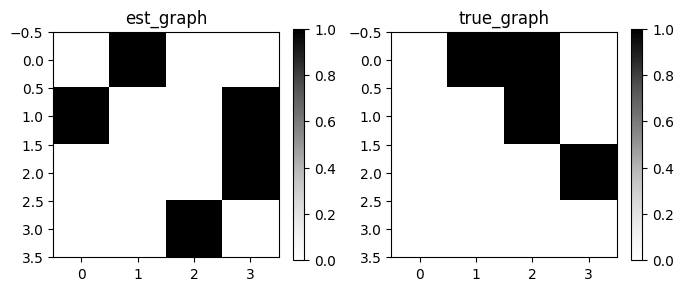

{'fdr': 0.3333, 'tpr': 0.5, 'fpr': 0.5, 'shd': 3, 'nnz': 3, 'precision': 0.4, 'recall': 0.5, 'F1': 0.4444, 'gscore': 0.0}
symprod_simpson :  {'adjacency_f1': 0.5714285714285715, 'orientation_f1': 0.0}



~~~~~ WITH DISCRETIZATION ~~~~~
Working on the 60th level of discretization.
Working on the 50th level of discretization.
Working on the 40th level of discretization.
Working on the 30th level of discretization.
Working on the 20th level of discretization.
Working on the 10th level of discretization.


100%|██████████| 100/100 [00:15<00:00,  6.32it/s]


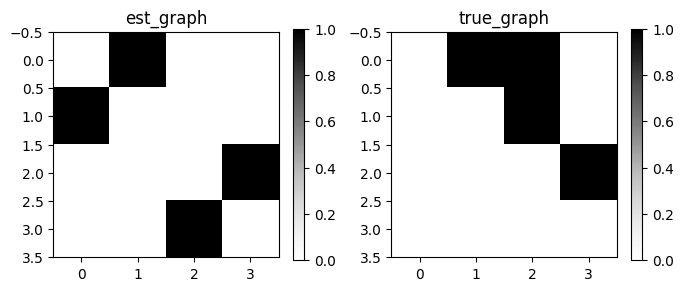

{'fdr': 0.0, 'tpr': 0.5, 'fpr': 0.0, 'shd': 2, 'nnz': 2, 'precision': 0.5, 'recall': 0.5, 'F1': 0.5, 'gscore': 0.0}
symprod_simpson :  {'adjacency_f1': 0.6666666666666666, 'orientation_f1': 0.0}


In [26]:
# ~~~~~~~~ NONLIN SIMPSON ~~~~~~~~
csuite_dataset = nonlin_simpson

# Without discretization
print("~~~~~ WITHOUT DISCRETIZATION ~~~~~")
df_non_simpson, gt_graph_non_simpson = csuite_dataset(2000, True, True)
metrics_rl_not_tuned.append(causal_rl(df_non_simpson, gt_graph_non_simpson, 'symprod_simpson', {'nb_epoch': 100}))

# With discretization
print("\n\n\n~~~~~ WITH DISCRETIZATION ~~~~~")
df_non_simpson_hart = hartemink_discretization(df_non_simpson)
metrics_rl_not_tuned_hartemink.append(causal_rl(df_non_simpson_hart, gt_graph_non_simpson, 'symprod_simpson', {'nb_epoch': 100}))

~~~~~ WITHOUT DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:16<00:00,  6.16it/s]


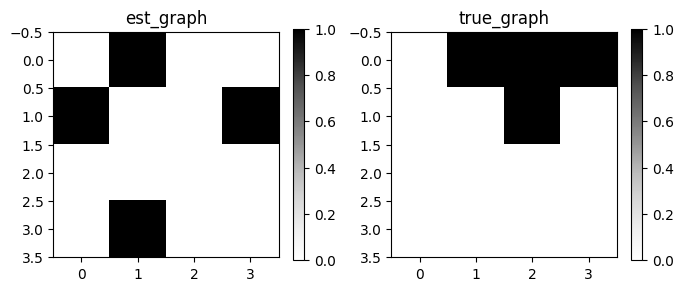

{'fdr': 0.5, 'tpr': 0.25, 'fpr': 0.5, 'shd': 4, 'nnz': 2, 'precision': 0.25, 'recall': 0.25, 'F1': 0.25, 'gscore': 0.0}
symprod_simpson :  {'adjacency_f1': 0.3333333333333333, 'orientation_f1': 0.0}



~~~~~ WITH DISCRETIZATION ~~~~~
Working on the 60th level of discretization.
Working on the 50th level of discretization.
Working on the 40th level of discretization.
Working on the 30th level of discretization.
Working on the 20th level of discretization.
Working on the 10th level of discretization.


100%|██████████| 100/100 [00:25<00:00,  3.85it/s]


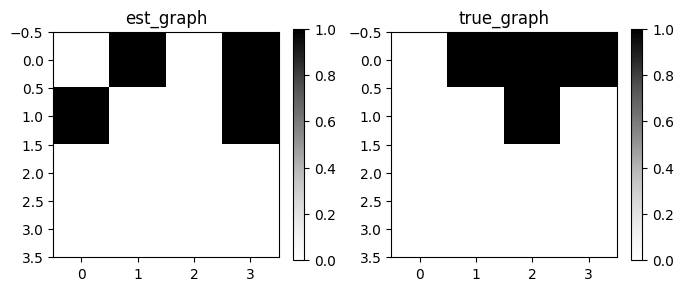

{'fdr': 0.3333, 'tpr': 0.5, 'fpr': 0.5, 'shd': 3, 'nnz': 3, 'precision': 0.5, 'recall': 0.5, 'F1': 0.5, 'gscore': 0.0}
symprod_simpson :  {'adjacency_f1': 0.5714285714285715, 'orientation_f1': 0.28571428571428575}


In [13]:
# ~~~~~~~~ SYMPROD SIMPSON ~~~~~~~~
csuite_dataset = symprod_simpson

# Without discretization
print("~~~~~ WITHOUT DISCRETIZATION ~~~~~")
df_simpson, gt_graph_simpson = csuite_dataset(2000, True, True)
metrics_rl_not_tuned.append(causal_rl(df_simpson, gt_graph_simpson, 'symprod_simpson', {'nb_epoch': 100}))

# With discretization
print("\n\n\n~~~~~ WITH DISCRETIZATION ~~~~~")
df_simpson_hart = hartemink_discretization(df_simpson)
metrics_rl_not_tuned_hartemink.append(causal_rl(df_simpson_hart, gt_graph_simpson, 'symprod_simpson', {'nb_epoch': 100}))

~~~~~ WITHOUT DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:34<00:00,  2.91it/s]


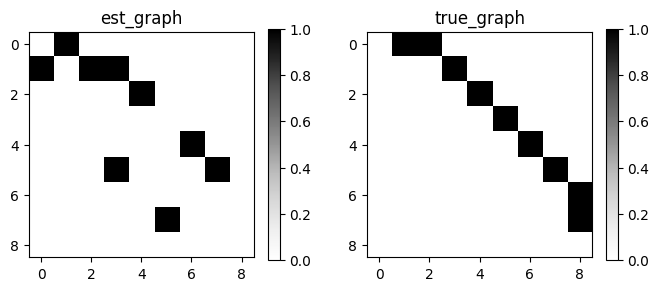

{'fdr': 0.2857, 'tpr': 0.5556, 'fpr': 0.0741, 'shd': 5, 'nnz': 7, 'precision': 0.5556, 'recall': 0.5556, 'F1': 0.5556, 'gscore': 0.1111}
large_backdoor :  {'adjacency_f1': 0.75, 'orientation_f1': 0.375}



~~~~~ WITH DISCRETIZATION ~~~~~
Working on the 60th level of discretization.
Working on the 50th level of discretization.
Working on the 40th level of discretization.
Working on the 30th level of discretization.
Working on the 20th level of discretization.
Working on the 10th level of discretization.


100%|██████████| 100/100 [00:34<00:00,  2.90it/s]


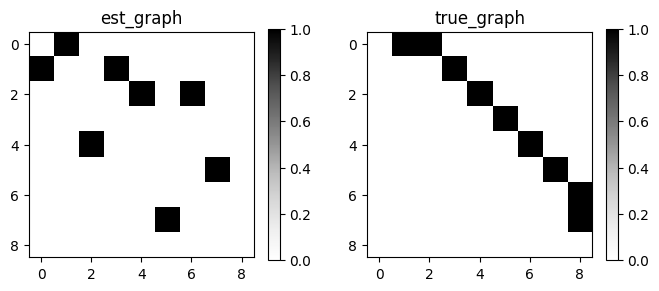

{'fdr': 0.2, 'tpr': 0.4444, 'fpr': 0.037, 'shd': 6, 'nnz': 5, 'precision': 0.5, 'recall': 0.4444, 'F1': 0.4706, 'gscore': 0.0}
large_backdoor :  {'adjacency_f1': 0.5714285714285714, 'orientation_f1': 0.14285714285714285}


In [17]:
# ~~~~~~~~ LARGE BACKDOOR ~~~~~~~~
csuite_dataset = large_backdoor

# Without discretization
print("~~~~~ WITHOUT DISCRETIZATION ~~~~~")
df_backdoor, gt_graph_backdoor = csuite_dataset(2000, True, True)
metrics_rl_not_tuned.append(causal_rl(df_backdoor, gt_graph_backdoor, 'large_backdoor', {'nb_epoch': 100}))

# With discretization
print("\n\n\n~~~~~ WITH DISCRETIZATION ~~~~~")
df_backdoor_hart = hartemink_discretization(df_backdoor)
metrics_rl_not_tuned_hartemink.append(causal_rl(df_backdoor_hart, gt_graph_backdoor, 'large_backdoor', {'nb_epoch': 100}))

~~~~~ WITHOUT DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:37<00:00,  2.69it/s]


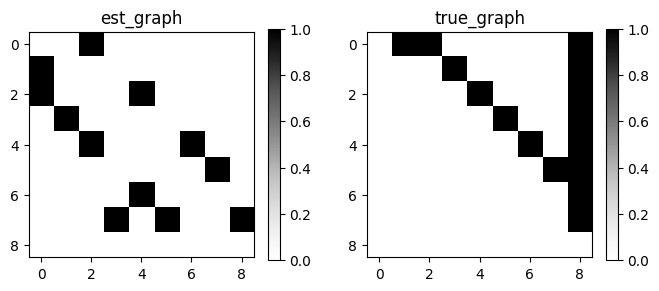

{'fdr': 0.375, 'tpr': 0.3333, 'fpr': 0.1429, 'shd': 11, 'nnz': 8, 'precision': 0.4167, 'recall': 0.3333, 'F1': 0.3704, 'gscore': 0.0}
weak_arrows :  {'adjacency_f1': 0.608695652173913, 'orientation_f1': 0.08695652173913045}



~~~~~ WITH DISCRETIZATION ~~~~~
Working on the 60th level of discretization.
Working on the 50th level of discretization.
Working on the 40th level of discretization.
Working on the 30th level of discretization.
Working on the 20th level of discretization.
Working on the 10th level of discretization.


100%|██████████| 100/100 [00:38<00:00,  2.59it/s]


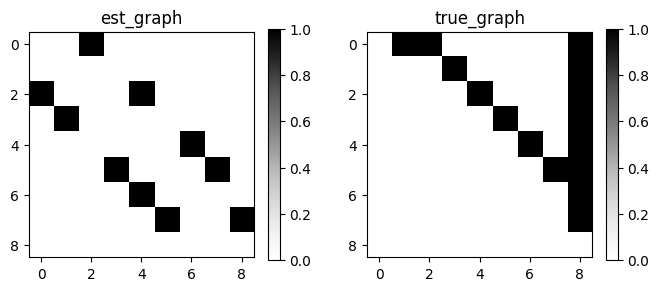

{'fdr': 0.2857, 'tpr': 0.3333, 'fpr': 0.0952, 'shd': 10, 'nnz': 7, 'precision': 0.5, 'recall': 0.3333, 'F1': 0.4, 'gscore': 0.0}
weak_arrows :  {'adjacency_f1': 0.6363636363636364, 'orientation_f1': 0.18181818181818182}


In [18]:
# ~~~~~~~~ WEAK ARROWS ~~~~~~~~
csuite_dataset = weak_arrows

# Without discretization
print("~~~~~ WITHOUT DISCRETIZATION ~~~~~")
df_arrows, gt_graph_arrows = csuite_dataset(2000, True, True)
metrics_rl_not_tuned.append(causal_rl(df_arrows, gt_graph_arrows, 'weak_arrows', {'nb_epoch': 100}))

# With discretization
print("\n\n\n~~~~~ WITH DISCRETIZATION ~~~~~")
df_arrows_hart = hartemink_discretization(df_arrows)
metrics_rl_not_tuned_hartemink.append(causal_rl(df_arrows_hart, gt_graph_arrows, 'weak_arrows', {'nb_epoch': 100}))

~~~~~ WITHOUT DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:41<00:00,  2.42it/s]


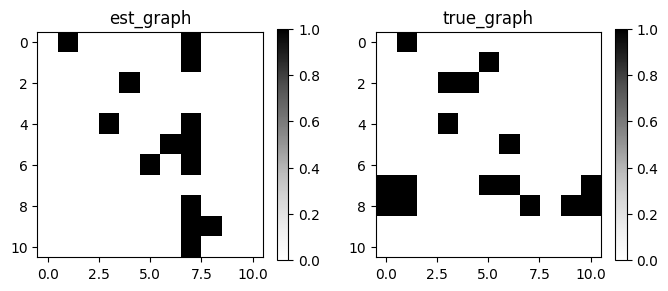

{'fdr': 0.6154, 'tpr': 0.3125, 'fpr': 0.2051, 'shd': 13, 'nnz': 13, 'precision': 0.3571, 'recall': 0.3125, 'F1': 0.3333, 'gscore': 0.0}
sachs_dataset :  {'adjacency_f1': 0.7586206896551724, 'orientation_f1': 0.27586206896551724}



~~~~~ WITH DISCRETIZATION ~~~~~
Working on the 60th level of discretization.
Working on the 50th level of discretization.
Working on the 40th level of discretization.
Working on the 30th level of discretization.
Working on the 20th level of discretization.
Working on the 10th level of discretization.


100%|██████████| 100/100 [00:38<00:00,  2.57it/s]


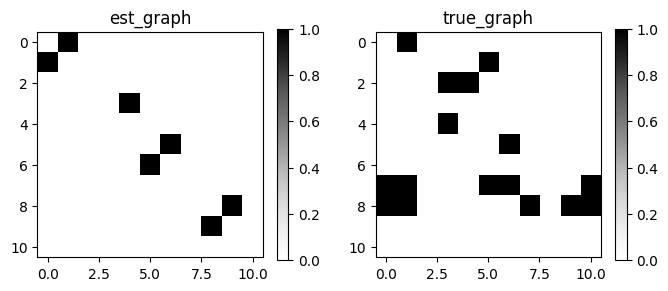

{'fdr': 0.25, 'tpr': 0.1875, 'fpr': 0.0256, 'shd': 13, 'nnz': 4, 'precision': 0.4286, 'recall': 0.1875, 'F1': 0.2609, 'gscore': 0.0}
weak_arrows :  {'adjacency_f1': 0.4, 'orientation_f1': 0.0}


In [30]:
# ~~~~~~~~ SACHS ~~~~~~~~

# Without discretization
print("~~~~~ WITHOUT DISCRETIZATION ~~~~~")
df_sachs, gt_graph_sachs = unaltered_dataset(get_data=True, return_index_name_correlation=False, return_adjacency_graph=True)
adj_f1_rl_nontuned_sachs, orient_f1_rl_nontuned_sachs = causal_rl(df_sachs, gt_graph_sachs, 'sachs_dataset', {'nb_epoch': 100}).values()

# With discretization
print("\n\n\n~~~~~ WITH DISCRETIZATION ~~~~~")
df_sachs_hart = hartemink_discretization(df_sachs)
adj_f1_rl_nontuned_sachs_hart, orient_f1_rl_nontuned_sachs_hart = (causal_rl(df_sachs_hart, gt_graph_sachs, 'weak_arrows', {'nb_epoch': 100}))

##Hyperparameter-Tuning of RL Model

In [ ]:
results_rl = tuning_rl( param_grid = { 'decoder_hidden_dim':[4,8,16,32],
                  'num_heads':[8,16,32],
                  'num_stacks': [4, 6],
                  'batch_size': [16, 32, 64],
                  'nb_epoch':[100]},datasets=datasets)
df_rl = pd.DataFrame(results_rl.values(), index=list(results_rl.keys())).transpose().reset_index(drop=True)


#num_heads: int -> actor input embedding
#num_stacks: int -> actor LSTM num_neurons
#decoder_hidden_dim: int -> hidden dimension for decoder
#batch_size: int -> batch size for training

100%|██████████| 100/100 [00:39<00:00,  2.53it/s]


In [ ]:
df_rl.head(5)

,lingauss,linexp,nonlingauss,nonlin_simpson,symprod_simpson,large_backdoor,weak_arrows
0,"{'adjacency_f1': 1.0, 'orientation_f1': 0.0}","{'adjacency_f1': 1.0, 'orientation_f1': 0.0}","{'adjacency_f1': 0.0, 'orientation_f1': 0.0}","{'adjacency_f1': 0.6666666666666666, 'orientat...","{'adjacency_f1': 0.888888888888889, 'orientati...","{'adjacency_f1': 0.7499999999999999, 'orientat...","{'adjacency_f1': 0.689655172413793, 'orientati..."
1,"{'adjacency_f1': 1.0, 'orientation_f1': 0.0}","{'adjacency_f1': 1.0, 'orientation_f1': 0.0}","{'adjacency_f1': 0.0, 'orientation_f1': 0.0}","{'adjacency_f1': 0.6666666666666665, 'orientat...","{'adjacency_f1': 0.75, 'orientation_f1': 0.5}","{'adjacency_f1': 0.5714285714285715, 'orientat...","{'adjacency_f1': 0.5161290322580646, 'orientat..."
2,"{'adjacency_f1': 1.0, 'orientation_f1': 0.0}","{'adjacency_f1': 1.0, 'orientation_f1': 0.0}","{'adjacency_f1': 0.0, 'orientation_f1': 0.0}","{'adjacency_f1': 0.6666666666666666, 'orientat...","{'adjacency_f1': 0.888888888888889, 'orientati...","{'adjacency_f1': 0.7499999999999999, 'orientat...","{'adjacency_f1': 0.689655172413793, 'orientati..."
3,"{'adjacency_f1': 1.0, 'orientation_f1': 0.0}","{'adjacency_f1': 1.0, 'orientation_f1': 0.0}","{'adjacency_f1': 0.0, 'orientation_f1': 0.0}","{'adjacency_f1': 0.6666666666666665, 'orientat...","{'adjacency_f1': 0.75, 'orientation_f1': 0.5}","{'adjacency_f1': 0.5714285714285715, 'orientat...","{'adjacency_f1': 0.5161290322580646, 'orientat..."
4,"{'adjacency_f1': 1.0, 'orientation_f1': 0.0}","{'adjacency_f1': 1.0, 'orientation_f1': 0.0}","{'adjacency_f1': 0.0, 'orientation_f1': 0.0}","{'adjacency_f1': 0.6666666666666666, 'orientat...","{'adjacency_f1': 0.888888888888889, 'orientati...","{'adjacency_f1': 0.7499999999999999, 'orientat...","{'adjacency_f1': 0.689655172413793, 'orientati..."


In [ ]:
# Initialize empty dictionaries to store row numbers
max_adjacency_f1_rows = {}
max_orientation_f1_rows = {}
max_adjacency_f1_params = {}
max_orientation_f1_params = {}

# Iterate over each column
for column in df_rl.columns:
    # Initialize variables to store max values and corresponding row numbers
    max_adjacency_f1 = float('-inf')
    max_adjacency_f1_row = None
    max_orientation_f1 = float('-inf')
    max_orientation_f1_row = None

    # Iterate over each row
    for index, row in df_rl.iterrows():
        # Get the dictionary corresponding to the current cell
        cell_data = row[column]

        # Check if the current cell contains valid data
        if isinstance(cell_data, dict):
            # Update max_adjacency_f1 if necessary
            if 'adjacency_f1' in cell_data and cell_data['adjacency_f1'] > max_adjacency_f1:
                max_adjacency_f1 = cell_data['adjacency_f1']
                max_adjacency_f1_row = index

            # Update max_orientation_f1 if necessary
            if 'orientation_f1' in cell_data and cell_data['orientation_f1'] > max_orientation_f1:
                max_orientation_f1 = cell_data['orientation_f1']
                max_orientation_f1_row = index

    # Store the row numbers in the dictionaries
    max_adjacency_f1_rows[column] = max_adjacency_f1_row
    max_orientation_f1_rows[column] = max_orientation_f1_row

    max_adjacency_f1_params[column] = list(results_rl[column])[max_adjacency_f1_row]
    max_orientation_f1_params[column] = list(results_rl[column])[max_orientation_f1_row]

# Print the dictionaries
print("Max Adjacency F1 Rows:", max_adjacency_f1_rows)
print("Max Orientation F1 Rows:", max_orientation_f1_rows)

print("Max Adjacency F1 Params:", max_adjacency_f1_params)
print("Max Orientation F1 Params:", max_orientation_f1_params)

Max Adjacency F1 Rows: {'lingauss': 0, 'linexp': 0, 'nonlingauss': 0, 'nonlin_simpson': 19, 'symprod_simpson': 6, 'large_backdoor': 18, 'weak_arrows': 12}
Max Orientation F1 Rows: {'lingauss': 0, 'linexp': 0, 'nonlingauss': 0, 'nonlin_simpson': 19, 'symprod_simpson': 6, 'large_backdoor': 18, 'weak_arrows': 0}
Max Adjacency F1 Params: {'lingauss': (('batch_size', 16), ('decoder_hidden_dim', 4), ('nb_epoch', 100), ('num_heads', 8), ('num_stacks', 4)), 'linexp': (('batch_size', 16), ('decoder_hidden_dim', 4), ('nb_epoch', 100), ('num_heads', 8), ('num_stacks', 4)), 'nonlingauss': (('batch_size', 16), ('decoder_hidden_dim', 4), ('nb_epoch', 100), ('num_heads', 8), ('num_stacks', 4)), 'nonlin_simpson': (('batch_size', 16), ('decoder_hidden_dim', 32), ('nb_epoch', 100), ('num_heads', 8), ('num_stacks', 6)), 'symprod_simpson': (('batch_size', 16), ('decoder_hidden_dim', 8), ('nb_epoch', 100), ('num_heads', 8), ('num_stacks', 4)), 'large_backdoor': (('batch_size', 16), ('decoder_hidden_dim', 3

### After Tuning

In [19]:
param_grid_final = {
    'batch_size': 16,
    'nb_epoch': 100,
    'num_heads': 8,
    'num_stacks': 4,
    'decoder_hidden_dim': 32,
    # Add more hyperparameters as needed
}

~~~~~ WITHOUT DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:03<00:00, 28.09it/s]


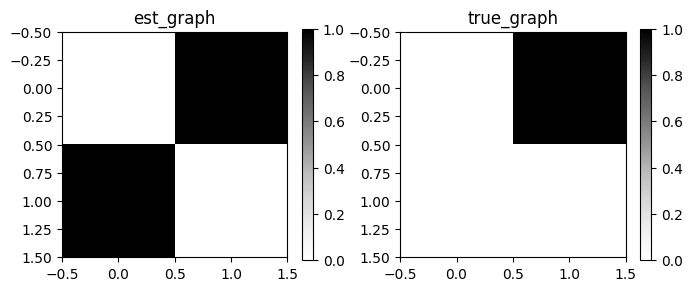

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 1, 'precision': 0.5, 'recall': 1.0, 'F1': 0.6667, 'gscore': 0.0}
lingauss :  {'adjacency_f1': 1.0, 'orientation_f1': 0.0}



~~~~~ WITH DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:03<00:00, 28.76it/s]


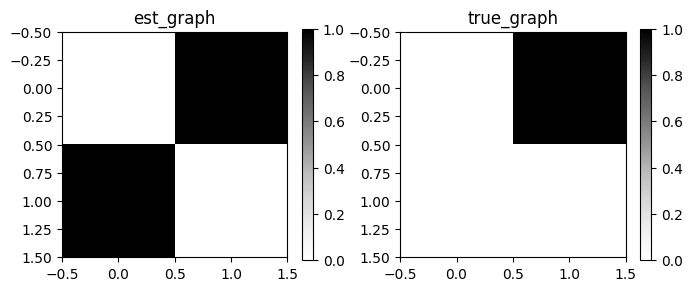

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 1, 'precision': 0.5, 'recall': 1.0, 'F1': 0.6667, 'gscore': 0.0}
lingauss :  {'adjacency_f1': 1.0, 'orientation_f1': 0.0}


In [20]:
# ~~~~~~~~ LINGAUSS ~~~~~~~~

# Without discretization
print("~~~~~ WITHOUT DISCRETIZATION ~~~~~")
metrics_rl_tuned_csuite.append(causal_rl(df_lingauss, gt_graph_lingauss, 'lingauss', param_grid_final))

# With discretization
print("\n\n\n~~~~~ WITH DISCRETIZATION ~~~~~")
metrics_rl_tuned_csuite_hartemink.append(causal_rl(df_lingauss_hart, gt_graph_lingauss, 'lingauss', param_grid_final))

~~~~~ WITHOUT DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:03<00:00, 29.13it/s]


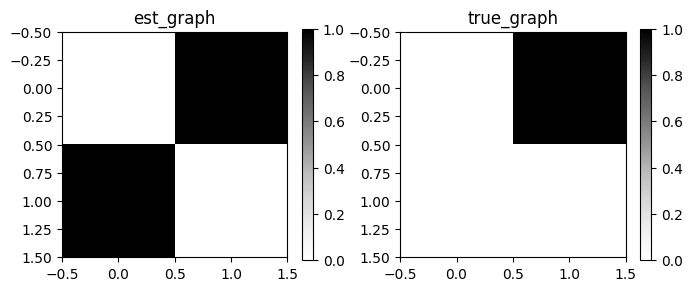

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 1, 'precision': 0.5, 'recall': 1.0, 'F1': 0.6667, 'gscore': 0.0}
linexp :  {'adjacency_f1': 1.0, 'orientation_f1': 0.0}



~~~~~ WITH DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:04<00:00, 24.04it/s]


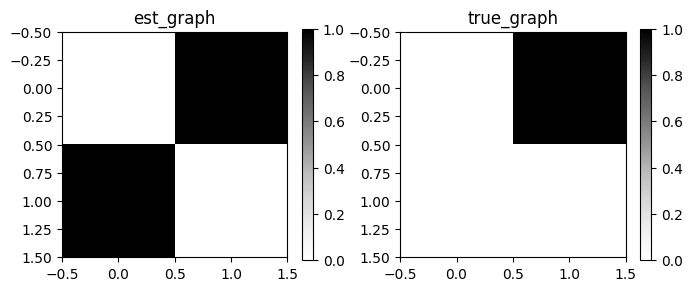

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 1, 'precision': 0.5, 'recall': 1.0, 'F1': 0.6667, 'gscore': 0.0}
linexp :  {'adjacency_f1': 1.0, 'orientation_f1': 0.0}


In [21]:
# ~~~~~~~~ LINEXP ~~~~~~~~

# Without discretization
print("~~~~~ WITHOUT DISCRETIZATION ~~~~~")
metrics_rl_tuned_csuite.append(causal_rl(df_linexp, gt_graph_linexp, 'linexp', param_grid_final))

# With discretization
print("\n\n\n~~~~~ WITH DISCRETIZATION ~~~~~")
metrics_rl_tuned_csuite_hartemink.append(causal_rl(df_linexp_hart, gt_graph_linexp, 'linexp', param_grid_final))

~~~~~ WITHOUT DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:03<00:00, 25.10it/s]


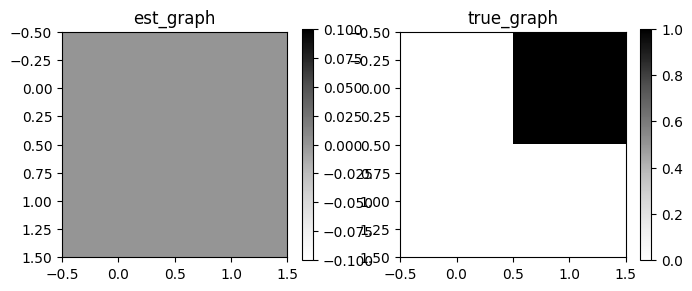

/usr/local/lib/python3.10/dist-packages/castle/metrics/evaluation.py:224: RuntimeWarning: invalid value encountered in divide
  precision = TP/TP_FP


{'fdr': 0.0, 'tpr': 0.0, 'fpr': 0.0, 'shd': 1, 'nnz': 0, 'precision': nan, 'recall': 0.0, 'F1': nan, 'gscore': 0.0}
nonlingauss :  {'adjacency_f1': 0.0, 'orientation_f1': 0.0}



~~~~~ WITH DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:03<00:00, 30.21it/s]


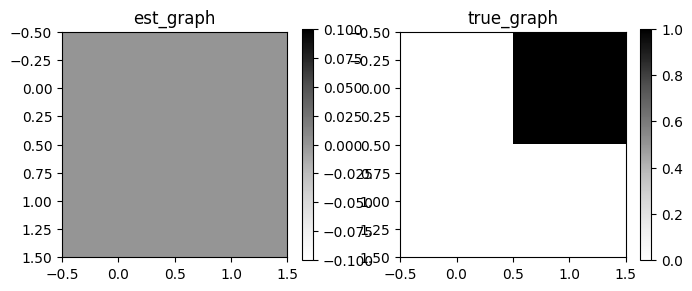

{'fdr': 0.0, 'tpr': 0.0, 'fpr': 0.0, 'shd': 1, 'nnz': 0, 'precision': nan, 'recall': 0.0, 'F1': nan, 'gscore': 0.0}
nonlingauss :  {'adjacency_f1': 0.0, 'orientation_f1': 0.0}


/usr/local/lib/python3.10/dist-packages/castle/metrics/evaluation.py:224: RuntimeWarning: invalid value encountered in divide
  precision = TP/TP_FP


In [22]:
# ~~~~~~~~ NONLINGAUSS ~~~~~~~~

# Without discretization
print("~~~~~ WITHOUT DISCRETIZATION ~~~~~")
metrics_rl_tuned_csuite.append(causal_rl(df_nonlingauss, gt_graph_nonlingauss, 'nonlingauss', param_grid_final))

# With discretization
print("\n\n\n~~~~~ WITH DISCRETIZATION ~~~~~")
metrics_rl_tuned_csuite_hartemink.append(causal_rl(df_nonlingauss_hart, gt_graph_nonlingauss, 'nonlingauss', param_grid_final))

~~~~~ WITHOUT DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:04<00:00, 22.55it/s]


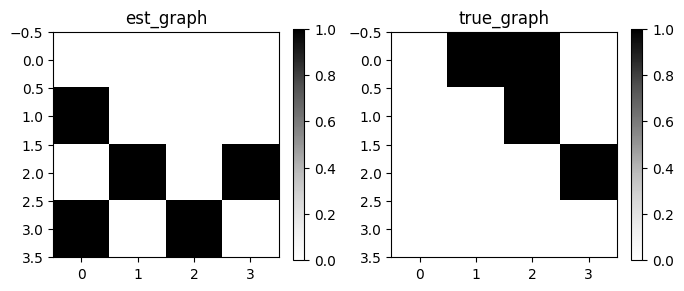

{'fdr': 0.75, 'tpr': 0.25, 'fpr': 1.5, 'shd': 4, 'nnz': 4, 'precision': 0.2, 'recall': 0.25, 'F1': 0.2222, 'gscore': 0.0}
nonlin_simpson :  {'adjacency_f1': 0.75, 'orientation_f1': 0.0}



~~~~~ WITH DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:06<00:00, 14.47it/s]


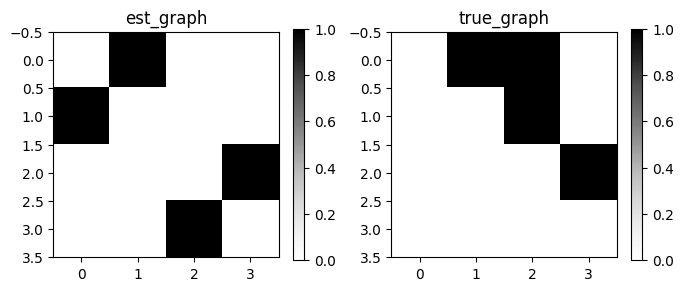

{'fdr': 0.0, 'tpr': 0.5, 'fpr': 0.0, 'shd': 2, 'nnz': 2, 'precision': 0.5, 'recall': 0.5, 'F1': 0.5, 'gscore': 0.0}
nonlin_simpson :  {'adjacency_f1': 0.6666666666666666, 'orientation_f1': 0.0}


In [27]:
# ~~~~~~~~ NONLIN SIMPSON ~~~~~~~~

# Without discretization
print("~~~~~ WITHOUT DISCRETIZATION ~~~~~")
metrics_rl_tuned_csuite.append(causal_rl(df_non_simpson, gt_graph_non_simpson, 'nonlin_simpson', param_grid_final))

# With discretization
print("\n\n\n~~~~~ WITH DISCRETIZATION ~~~~~")
metrics_rl_tuned_csuite_hartemink.append(causal_rl(df_non_simpson_hart, gt_graph_non_simpson, 'nonlin_simpson', param_grid_final))

~~~~~ WITHOUT DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:06<00:00, 15.18it/s]


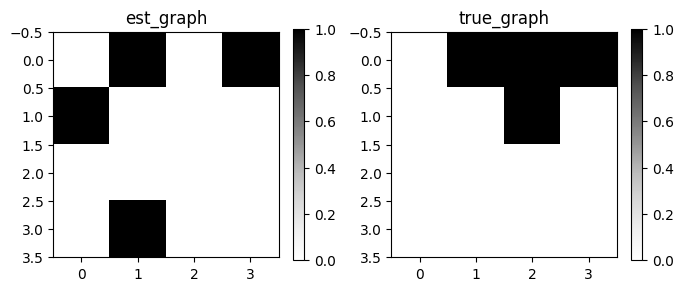

{'fdr': 0.3333, 'tpr': 0.5, 'fpr': 0.5, 'shd': 3, 'nnz': 3, 'precision': 0.5, 'recall': 0.5, 'F1': 0.5, 'gscore': 0.0}
symprod_simpson :  {'adjacency_f1': 0.5714285714285715, 'orientation_f1': 0.28571428571428575}



~~~~~ WITH DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:04<00:00, 20.16it/s]


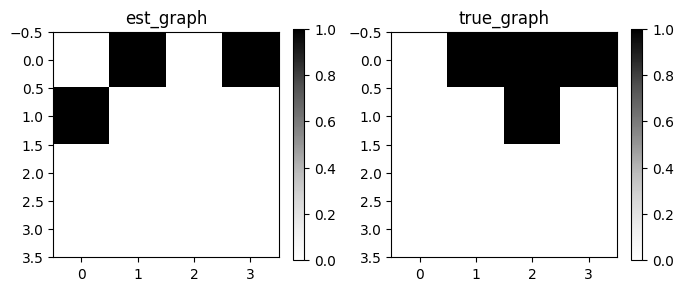

{'fdr': 0.0, 'tpr': 0.5, 'fpr': 0.0, 'shd': 2, 'nnz': 2, 'precision': 0.6667, 'recall': 0.5, 'F1': 0.5714, 'gscore': 0.25}
symprod_simpson :  {'adjacency_f1': 0.6666666666666666, 'orientation_f1': 0.3333333333333333}


In [23]:
# ~~~~~~~~ SYMPROD SIMPSON ~~~~~~~~

# Without discretization
print("~~~~~ WITHOUT DISCRETIZATION ~~~~~")
metrics_rl_tuned_csuite.append(causal_rl(df_simpson, gt_graph_simpson, 'symprod_simpson', param_grid_final))

# With discretization
print("\n\n\n~~~~~ WITH DISCRETIZATION ~~~~~")
metrics_rl_tuned_csuite_hartemink.append(causal_rl(df_simpson_hart, gt_graph_simpson, 'symprod_simpson', param_grid_final))

~~~~~ WITHOUT DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:19<00:00,  5.16it/s]


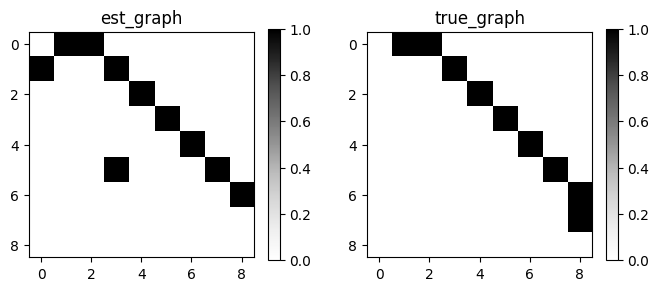

{'fdr': 0.0, 'tpr': 0.8889, 'fpr': 0.0, 'shd': 1, 'nnz': 8, 'precision': 0.8, 'recall': 0.8889, 'F1': 0.8421, 'gscore': 0.6667}
large_backdoor :  {'adjacency_f1': 0.9411764705882353, 'orientation_f1': 0.7058823529411765}



~~~~~ WITH DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:13<00:00,  7.15it/s]


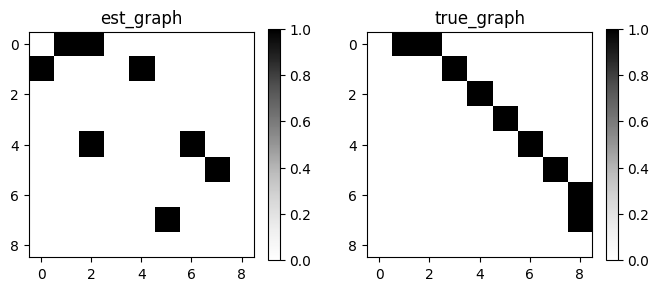

{'fdr': 0.3333, 'tpr': 0.4444, 'fpr': 0.0741, 'shd': 6, 'nnz': 6, 'precision': 0.5, 'recall': 0.4444, 'F1': 0.4706, 'gscore': 0.0}
large_backdoor :  {'adjacency_f1': 0.6666666666666667, 'orientation_f1': 0.26666666666666666}


In [24]:
# ~~~~~~~~ LARGE BACKDOOR ~~~~~~~~

# Without discretization
print("~~~~~ WITHOUT DISCRETIZATION ~~~~~")
metrics_rl_tuned_csuite.append(causal_rl(df_backdoor, gt_graph_backdoor, 'large_backdoor', param_grid_final))

# With discretization
print("\n\n\n~~~~~ WITH DISCRETIZATION ~~~~~")
metrics_rl_tuned_csuite_hartemink.append(causal_rl(df_backdoor_hart, gt_graph_backdoor, 'large_backdoor', param_grid_final))

~~~~~ WITHOUT DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:14<00:00,  6.69it/s]


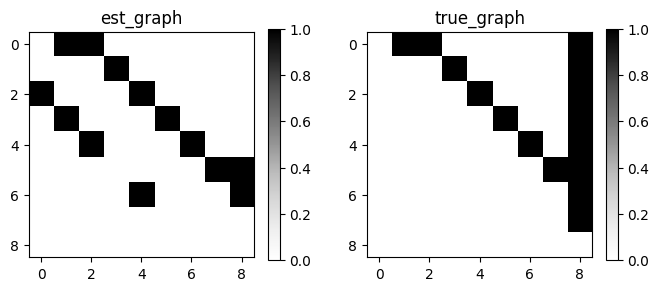

{'fdr': 0.0, 'tpr': 0.6, 'fpr': 0.0, 'shd': 6, 'nnz': 9, 'precision': 0.6923, 'recall': 0.6, 'F1': 0.6429, 'gscore': 0.3333}
weak_arrows :  {'adjacency_f1': 0.7499999999999999, 'orientation_f1': 0.4166666666666667}



~~~~~ WITH DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:15<00:00,  6.29it/s]


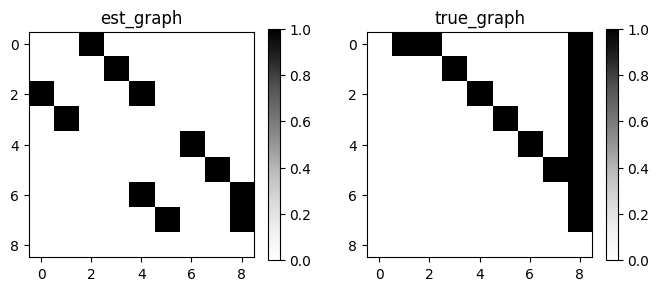

{'fdr': 0.0, 'tpr': 0.4667, 'fpr': 0.0, 'shd': 8, 'nnz': 7, 'precision': 0.6364, 'recall': 0.4667, 'F1': 0.5385, 'gscore': 0.2}
weak_arrows :  {'adjacency_f1': 0.6363636363636364, 'orientation_f1': 0.27272727272727276}


In [25]:
# ~~~~~~~~ WEAK ARROWS ~~~~~~~~

# Without discretization
print("~~~~~ WITHOUT DISCRETIZATION ~~~~~")
metrics_rl_tuned_csuite.append(causal_rl(df_arrows, gt_graph_arrows, 'weak_arrows', param_grid_final))

# With discretization
print("\n\n\n~~~~~ WITH DISCRETIZATION ~~~~~")
metrics_rl_tuned_csuite_hartemink.append(causal_rl(df_arrows_hart, gt_graph_arrows, 'weak_arrows', param_grid_final))

~~~~~ WITHOUT DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:13<00:00,  7.49it/s]


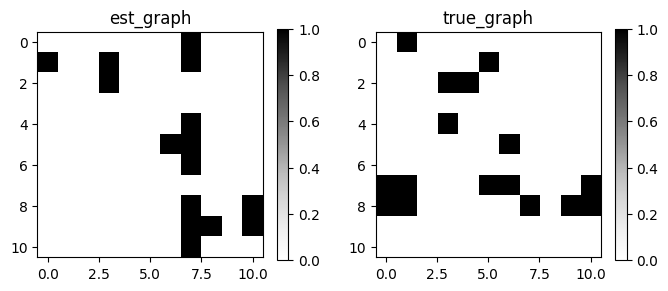

{'fdr': 0.7333, 'tpr': 0.25, 'fpr': 0.2821, 'shd': 16, 'nnz': 15, 'precision': 0.2667, 'recall': 0.25, 'F1': 0.2581, 'gscore': 0.0}
sachs_dataset :  {'adjacency_f1': 0.7096774193548386, 'orientation_f1': 0.2580645161290323}



~~~~~ WITH DISCRETIZATION ~~~~~


100%|██████████| 100/100 [00:14<00:00,  7.10it/s]


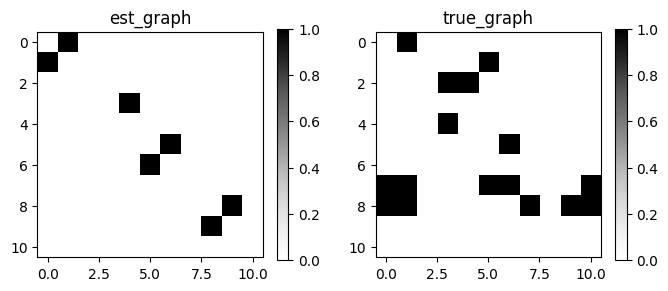

{'fdr': 0.25, 'tpr': 0.1875, 'fpr': 0.0256, 'shd': 13, 'nnz': 4, 'precision': 0.4286, 'recall': 0.1875, 'F1': 0.2609, 'gscore': 0.0}
sachs_dataset :  {'adjacency_f1': 0.4, 'orientation_f1': 0.0}


In [32]:
# ~~~~~~~~ SACHS ~~~~~~~~

# Without discretization
print("~~~~~ WITHOUT DISCRETIZATION ~~~~~")
adj_f1_rl_sachs, orient_f1_rl_sachs = causal_rl(df_sachs, gt_graph_sachs, 'sachs_dataset', param_grid_final).values()

# With discretization
print("\n\n\n~~~~~ WITH DISCRETIZATION ~~~~~")
adj_f1_rl_sachs_hart, orient_f1_rl_sachs_hart = causal_rl(df_sachs_hart, gt_graph_sachs, 'sachs_dataset',param_grid_final).values()

##RL Tuned vs Non-Tuned Comparision for All Datasets

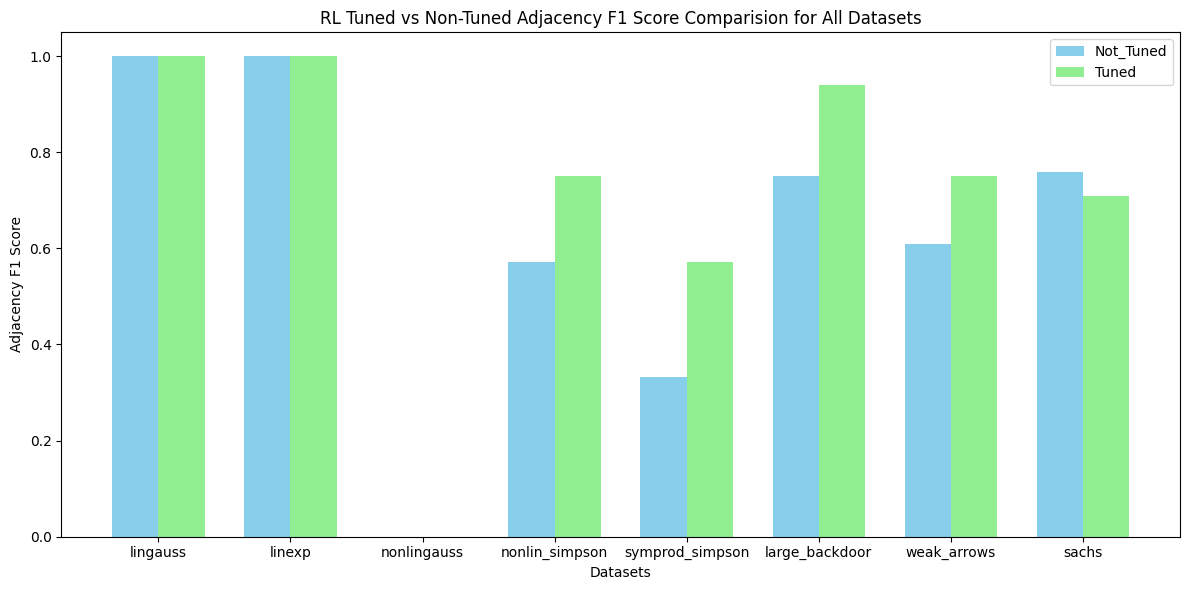

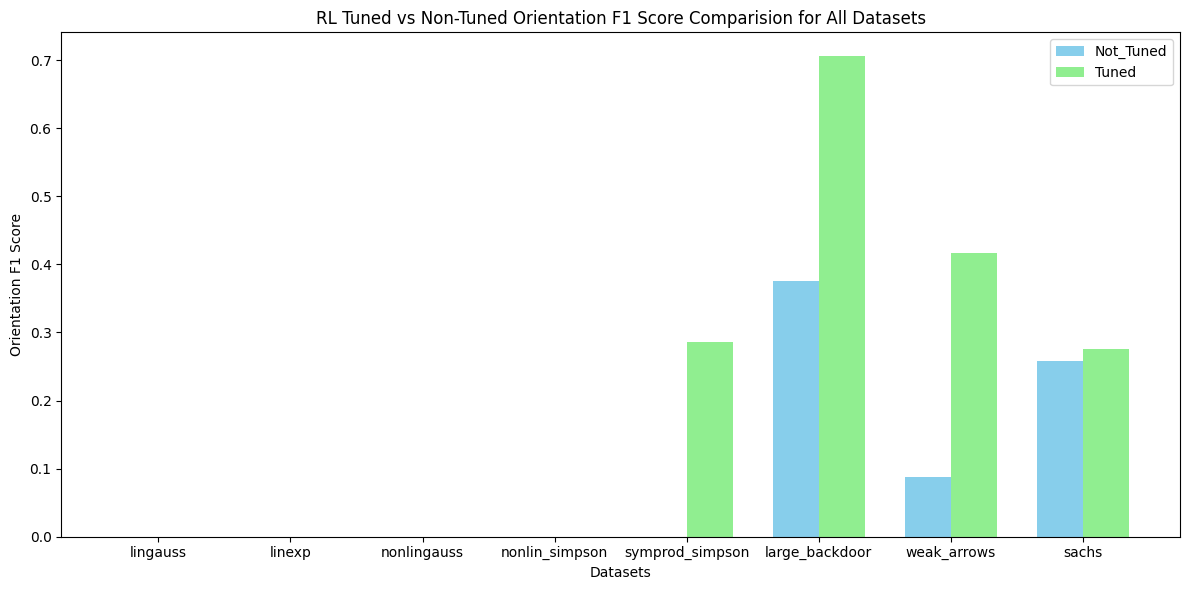

In [ ]:
all_datasets = [i.__name__ for i in datasets] + ['sachs']

not_tuned_adjacency = [d['adjacency_f1'] for d in metrics_rl_not_tuned] + [adj_f1_rl_nontuned_sachs]
tuned_adjacency = [d['adjacency_f1'] for d in metrics_rl_tuned_csuite] + [adj_f1_rl_sachs]

not_tuned_orientation = [d['orientation_f1'] for d in metrics_rl_not_tuned] + [orient_f1_rl_sachs]
tuned_orientation = [d['orientation_f1'] for d in metrics_rl_tuned_csuite] + [orient_f1_rl_nontuned_sachs]


# Define colors
colors = ['skyblue', 'lightgreen']
bar_width = 0.35
index = range(len(all_datasets))

# Plot sequence F1 scores
plt.figure(figsize=(12, 6))

plt.bar(index, not_tuned_adjacency, bar_width, label='Not_Tuned', color=colors[0])
plt.bar([i + bar_width for i in index], tuned_adjacency, bar_width, label='Tuned', color=colors[1])

plt.xlabel('Datasets')
plt.ylabel('Adjacency F1 Score')
plt.title('RL Tuned vs Non-Tuned Adjacency F1 Score Comparision for All Datasets')
plt.xticks([i + bar_width / 2 for i in index], all_datasets)
plt.legend()

plt.tight_layout()
plt.show()

# Plot unrolled F1 scores
plt.figure(figsize=(12, 6))

plt.bar(index, not_tuned_orientation, bar_width, label='Not_Tuned', color=colors[0])
plt.bar([i + bar_width for i in index], tuned_orientation, bar_width, label='Tuned', color=colors[1])

plt.xlabel('Datasets')
plt.ylabel('Orientation F1 Score')
plt.title('RL Tuned vs Non-Tuned Orientation F1 Score Comparision for All Datasets')
plt.xticks([i + bar_width / 2 for i in index], all_datasets)
plt.legend()

plt.tight_layout()
plt.show()

##RL Tuned Performance Comparision on All Datasets with and without Hartemink Discretization

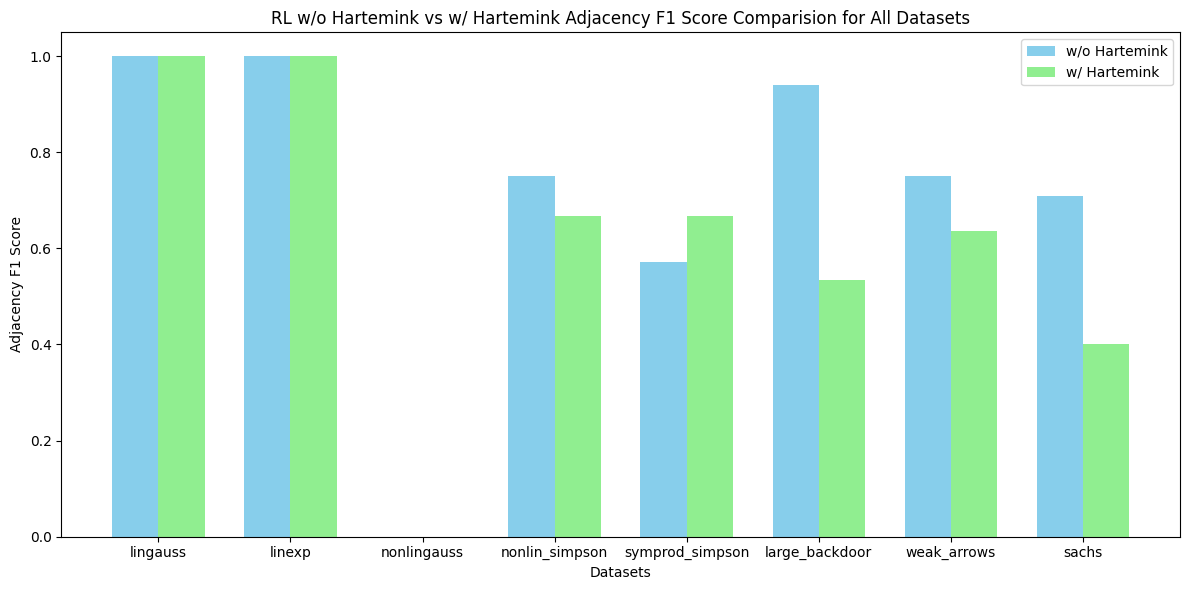

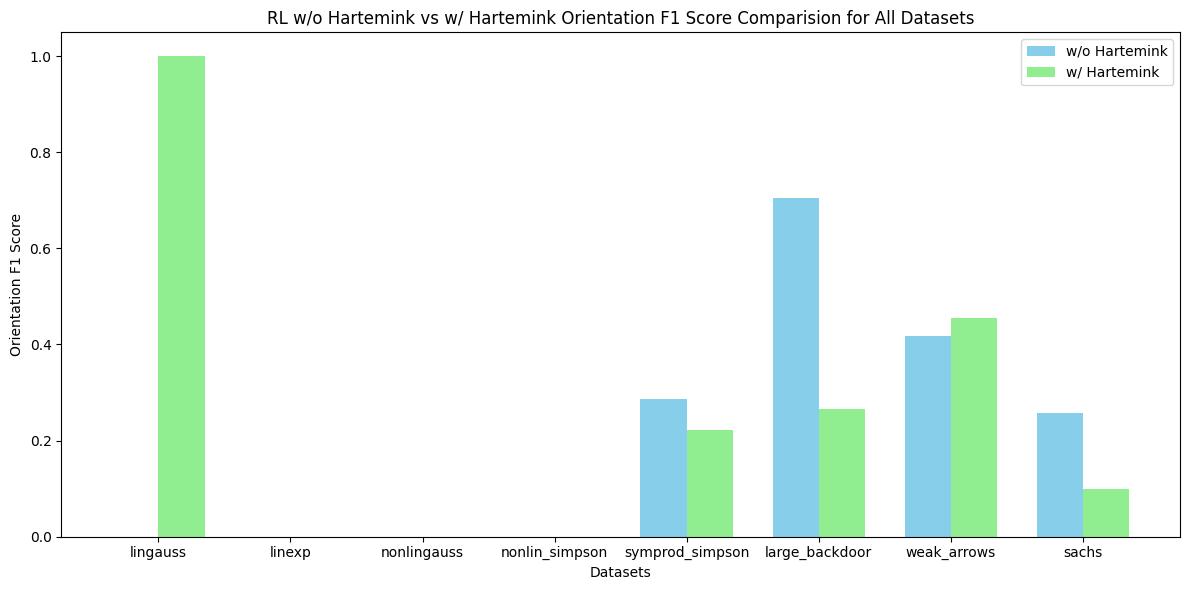

In [ ]:
all_datasets = [i.__name__ for i in datasets] + ['sachs']

tuned_adjacency = [d['adjacency_f1'] for d in metrics_rl_tuned_csuite] + [adj_f1_rl_sachs]
tuned_adjacency_hart = [d['adjacency_f1'] for d in metrics_rl_tuned_csuite_hartemink] + [adj_f1_rl_sachs_hart]

tuned_orientation = [d['orientation_f1'] for d in metrics_rl_tuned_csuite] + [orient_f1_rl_sachs]
tuned_orientation_hart = [d['orientation_f1'] for d in metrics_rl_tuned_csuite_hartemink] + [orient_f1_rl_sachs_hart]

# Define colors
colors = ['skyblue', 'lightgreen']
bar_width = 0.35
index = range(len(all_datasets))

# Plot sequence F1 scores
plt.figure(figsize=(12, 6))

plt.bar(index, tuned_adjacency, bar_width, label='w/o Hartemink', color=colors[0])
plt.bar([i + bar_width for i in index], tuned_adjacency_hart, bar_width, label='w/ Hartemink', color=colors[1])

plt.xlabel('Datasets')
plt.ylabel('Adjacency F1 Score')
plt.title('RL w/o Hartemink vs w/ Hartemink Adjacency F1 Score Comparision for All Datasets')
plt.xticks([i + bar_width / 2 for i in index], all_datasets)
plt.legend()

plt.tight_layout()
plt.show()

# Plot unrolled F1 scores
plt.figure(figsize=(12, 6))

plt.bar(index, tuned_orientation, bar_width, label='w/o Hartemink', color=colors[0])
plt.bar([i + bar_width for i in index], tuned_orientation_hart, bar_width, label='w/ Hartemink', color=colors[1])

plt.xlabel('Datasets')
plt.ylabel('Orientation F1 Score')
plt.title('RL w/o Hartemink vs w/ Hartemink Orientation F1 Score Comparision for All Datasets')
plt.xticks([i + bar_width / 2 for i in index], all_datasets)
plt.legend()

plt.tight_layout()
plt.show()

###ERROR ANALYSIS

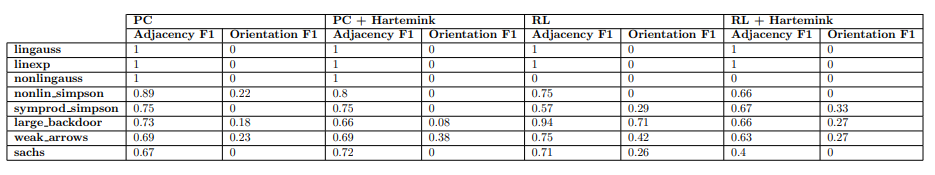

**lingauss, linexp:**
The RL model achieves perfect adjacency F1 score but struggles with orientation (F1 = 0.0) in both cases.
These datasets might have straightforward relationships captured well by adjacency matrices but more complex directional dependencies not effectively captured by the RL model.

**nonlingauss:**
RL model fails to predict any edges (adjacency F1 = 0.0) and struggles with orientation as well.
This dataset contains non-linear relationships and this may cause the RL model cannot effectively learn from.

**nonlin_simpson:**
Moderate performance with decent adjacency F1 score (0.75) but still struggles with orientation (F1 = 0.0).
Complex relationships in this dataset might pose challenges for the RL model's orientation prediction.

**symprod_simpson:**
Achieves decent performance in both adjacency (0.57) and orientation (0.29) F1 scores.
The RL model captures some of the relationships effectively but still struggles with complex orientation.

**large_backdoor:**
Excellent performance with high adjacency (0.94) and orientation (0.71) F1 scores.
The RL model excels in capturing the complex backdoor relationships present in this dataset.

**weak_arrows:**
Achieves decent performance in both adjacency (0.75) and orientation (0.42) F1 scores.
The RL model performs relatively well but still struggles with capturing all weak arrow relationships accurately.

**Data After Hartemink Discretization:**
After discretization, the RL model generally shows improvement in adjacency and orientation F1 scores across most datasets.

**RL Model Strengths:**

*   Effective in capturing complex causal structures such as backdoor paths and weak arrows.
*   Ability to adapt and optimize graph structures based on dataset characteristics.
* In this current implementation, computing scores is much more time consuming than training NNs. So, developing a more efficient and effective score function will further improve the proposed approach.

**PC Model Strengths:**

*   Maintains consistent performance across datasets, especially in capturing certain causal structures.
*   Well-suited for datasets with simpler causal relationships.